# Forecasting Indonesia’s Food Preparations Imports from Singapore

##  Objective

To forecast Indonesia’s import value of food preparation products (HS Code 210690) from Singapore using ARIMA time series analysis, based on ASEAN trade data (2013–2023)


---

##  Dataset Overview

- **Source**: International Trade Centre Data
- **Years**: 2013–2023
- **Countries**: Indonesia (as reporter) importing from Malaysia, Philipphines Singapore, Thailand, and Vietnam
- **Trade Type**: Imports only
- **Unit of Measure**: Trade value (USD Thousand)
- **Product Scope**: Focused on 11 selected FMCG-related HS Codes
- **Link**: https://www.trademap.org/Index.aspx?nvpm=1%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c%7c

---

###  Selected HS Codes:

| HS Code | Product Name (Label)                                       | Description (English)                                                                            |
| ------- | ---------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| 110100  | Wheat or meslin flour                                      | Milled flour from wheat or meslin, a key raw material for bakery and food processing industries. |
| 150790  | Refined soya-bean oil (excl. crude or chemically modified) | Edible refined soybean oil used in cooking, frying, and industrial food production.              |
| 151620  | Hydrogenated vegetable fats and oils                       | Solid or semi-solid fats used in baking and food manufacturing (e.g., margarine).                |
| 160414  | Prepared/preserved tuna (whole or in pieces)               | Canned or preserved tuna products for direct consumption or foodservice.                         |
| 170410  | Chewing gum                                                | Flavored gum products, often sugar-coated, used for confectionery.                               |
| 190190  | Malt extract and starch-based food preparations            | Ingredients used in cereals, energy bars, and infant food, often for nutritional value.          |
| 190540  | Rusks and toasted bread                                    | Dry baked goods, typically long shelf-life, used as snacks or breakfast foods.                   |
| 190590  | Bread, pastry, cakes, biscuits, etc.                       | A wide range of baked goods including cookies, pastries, and cakes.                              |
| 210390  | Preparations for sauces and condiments                     | Mixed seasonings and ready-made sauces (excl. soy sauce), often used in fast-moving kitchens.    |
| 210690  | Food preparations, n.e.s.                                  | Other processed or mixed food items not classified elsewhere (e.g., instant food mixes).         |
| 220299  | Non-alcoholic beverages (excl. juice, milk, beer, water)   | Flavored drinks such as energy drinks, iced tea, or soda (excluding common categories).          |


### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Data Inspection

In [16]:
df = pd.read_excel("Data_2.xlsx")

In [17]:
df.head(6)

,Product code,Product label,Partner,Year,Value
0,110100,Wheat or meslin flour,Malaysia,2013,2382
1,110100,Wheat or meslin flour,Malaysia,2014,3998
2,110100,Wheat or meslin flour,Malaysia,2015,84
3,110100,Wheat or meslin flour,Malaysia,2016,5
4,110100,Wheat or meslin flour,Malaysia,2017,0
5,110100,Wheat or meslin flour,Malaysia,2018,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product code   605 non-null    int64 
 1   Product label  605 non-null    object
 2   Partner        605 non-null    object
 3   Year           605 non-null    int64 
 4   Value          605 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 23.8+ KB


In [19]:
df.describe()

,Product code,Year,Value
count,605.000000,605.000000,605.000000
mean,177821.181818,2018.000000,8525.033058
std,31337.440353,3.164894,17434.722893
min,110100.000000,2013.000000,0.000000
25%,151620.000000,2015.000000,0.000000
50%,190190.000000,2018.000000,567.000000
75%,210390.000000,2021.000000,8948.000000
max,220299.000000,2023.000000,124730.000000


In [20]:
df['Product code'].value_counts()

Product code
110100    55
150790    55
151620    55
160414    55
170410    55
190190    55
190540    55
190590    55
210390    55
210690    55
220299    55
Name: count, dtype: int64

In [21]:
df['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

###  Data Cleaning

In [22]:
# Filter only relevant HS codes
hs_codes = [110100, 150790, 151620, 160414, 170410, 190190, 190540, 190590, 210390, 210690, 220299]
df = df[df['Product code'].isin(hs_codes)]

In [23]:
#standardize country names
df['Partner'] = df['Partner'].str.strip()

In [24]:
#standardize trade value
df['Value'] = df['Value'] 

In [25]:
# Check Missing Values
df.isnull().sum()

Product code     0
Product label    0
Partner          0
Year             0
Value            0
dtype: int64

### Exploratory Data Analysis (EDA)

##### Total Import Value by Product in 2023

In [26]:
df_2023 = df[df['Year'] == 2023]

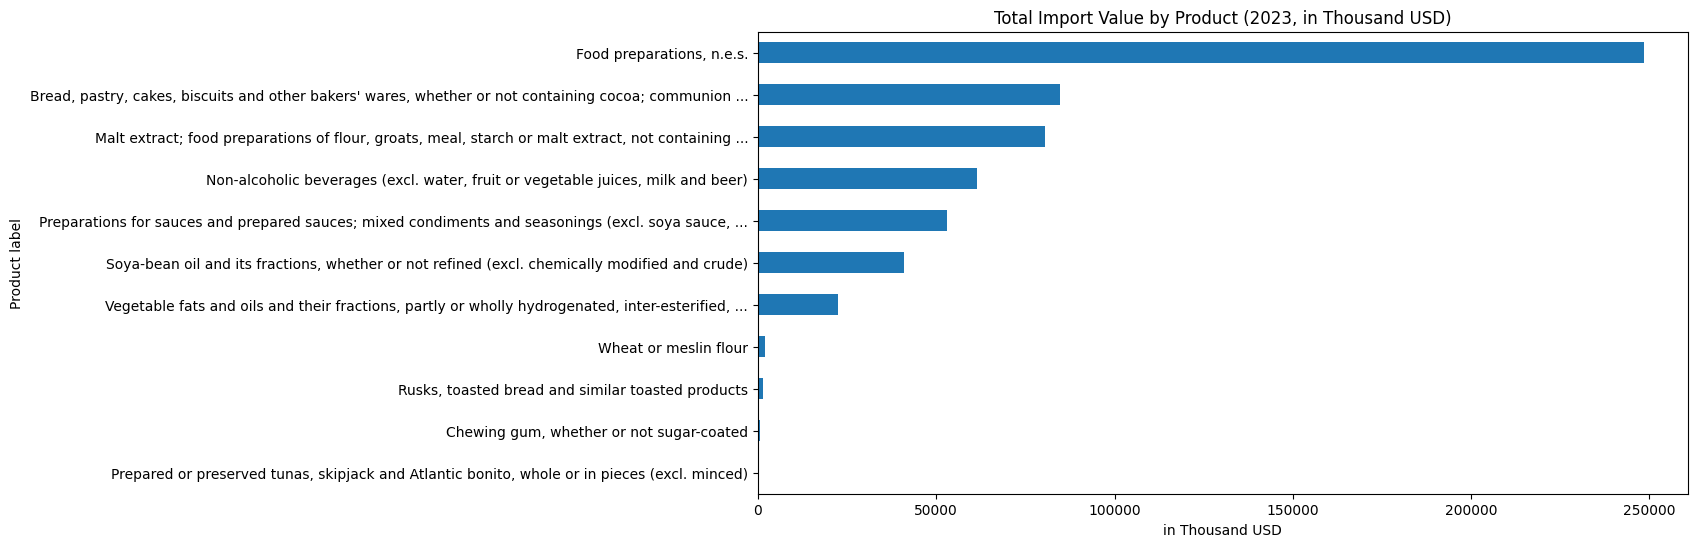

In [27]:
df_2023.groupby('Product label')['Value'].sum().sort_values(ascending=True).plot(
    kind='barh',
    title='Total Import Value by Product (2023, in Thousand USD)',
    figsize=(12, 6)
)
plt.xlabel('in Thousand USD')
plt.show()

In [34]:
df_2023 = df[df['Year'] == 2023]
df_grouped = df_2023.groupby('Product label')['Value'].sum().sort_values(ascending=False)
print(df_grouped)

Product label
Food preparations, n.e.s.                                                                                 248363
Bread, pastry, cakes, biscuits and other bakers' wares, whether or not containing cocoa; communion ...     84749
Malt extract; food preparations of flour, groats, meal, starch or malt extract, not containing ...         80597
Non-alcoholic beverages (excl. water, fruit or vegetable juices, milk and beer)                            61477
Preparations for sauces and prepared sauces; mixed condiments and seasonings (excl. soya sauce, ...        53070
Soya-bean oil and its fractions, whether or not refined (excl. chemically modified and crude)              41044
Vegetable fats and oils and their fractions, partly or wholly hydrogenated, inter-esterified, ...          22579
Wheat or meslin flour                                                                                       2113
Rusks, toasted bread and similar toasted products                                 

##### 2. Which ASEAN countries export the most food preparations to Indonesia.

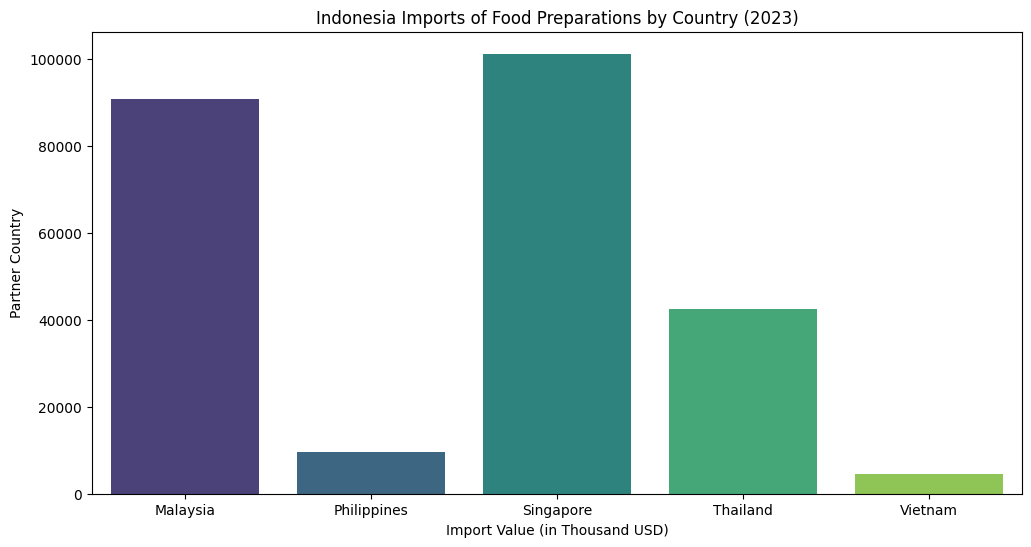

In [28]:
# Filter data hanya HS 210690 dan Year 2023
df_eda2 = df[(df['Product code'] == 210690) & (df['Year'] == 2023)]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_eda2,
    x='Partner',
    y='Value',
    palette='viridis',
    hue='Partner'
)
plt.title('Indonesia Imports of Food Preparations by Country (2023)')
plt.xlabel('Import Value (in Thousand USD)')
plt.ylabel('Partner Country')
plt.show()

In [35]:
df_fp = df[(df['Product code'] == 210690) & (df['Year'] == 2023)]
df_fp_grouped = df_fp.groupby('Partner')['Value'].sum().sort_values(ascending=False)
print(df_fp_grouped)

Partner
Singapore      101116
Malaysia        90692
Thailand        42468
Philippines      9588
Vietnam          4499
Name: Value, dtype: int64


##### 3. Yearly Trend of Food Preparations (2013–2023)

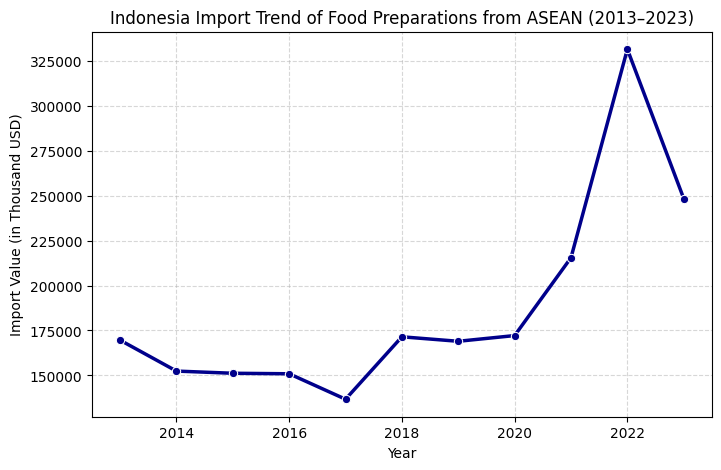

In [29]:
# Filter ASEAN & product HS 210690
df_eda3 = df[(df['Product code'] == 210690) & (df['Partner'].isin(['Malaysia', 'Thailand', 'Vietnam', 'Singapore', 'Philippines']))]

# Group by year
df_trend = df_eda3.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=df_trend, x='Year', y='Value', marker='o', linewidth=2.5, color='darkblue')
plt.title('Indonesia Import Trend of Food Preparations from ASEAN (2013–2023)')
plt.xlabel('Year')
plt.ylabel('Import Value (in Thousand USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [37]:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Vietnam', 'Philippines', ...]
df_asean = df[(df['Partner'].isin(asean)) & (df['Product code'] == 210690)]
trend = df_asean.groupby('Year')['Value'].sum()
print(trend)

Year
2013    169620
2014    152426
2015    151216
2016    150930
2017    136780
2018    171486
2019    168994
2020    172174
2021    215463
2022    331387
2023    248363
Name: Value, dtype: int64


#### 4. Country-Product Heatmap (2023)

In [32]:
df_eda_all = df[df['Year'] == 2023].copy()

# Hitung total per produk
df_eda_all['Value'] = df_eda_all['Value']

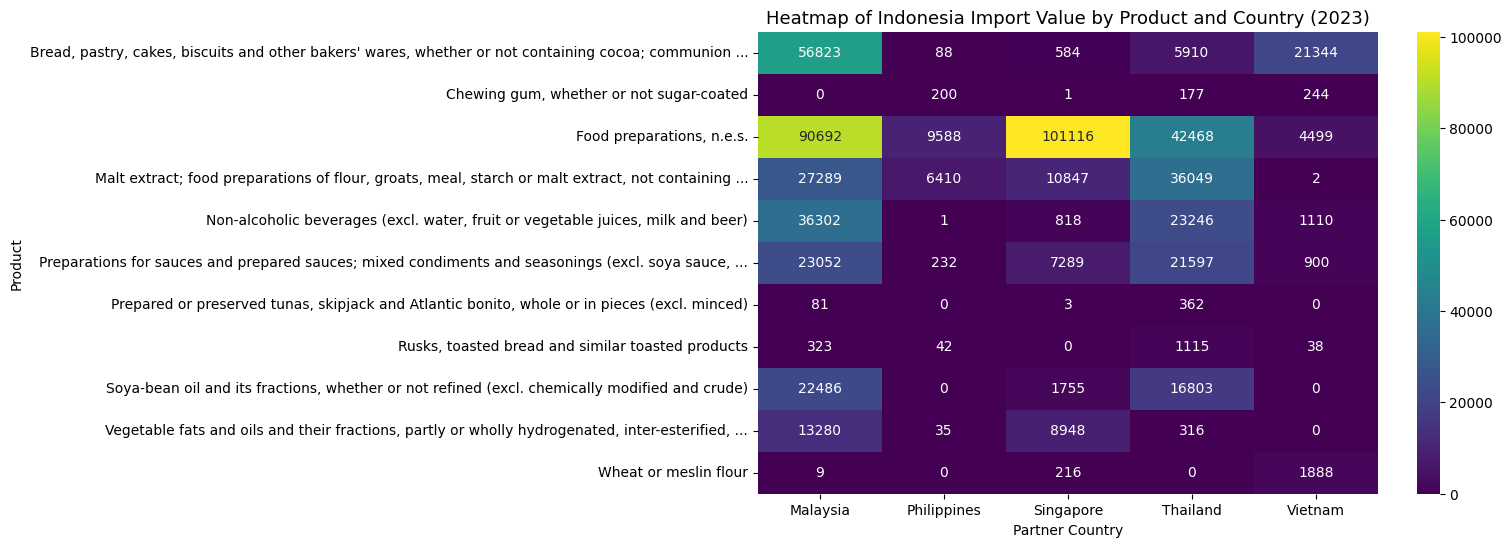

In [33]:
# Pivot table: negara di kolom, produk di baris
pivot = df_eda_all.pivot_table(
    index='Product label',
    columns='Partner',
    values='Value',
    aggfunc='sum'
).fillna(0)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Heatmap of Indonesia Import Value by Product and Country (2023)', fontsize=13)
plt.xlabel('Partner Country')
plt.ylabel('Product')
plt.show()


In [39]:
df_2023 = df[df['Year'] == 2023]
heatmap_df = df_2023.pivot_table(
    values='Value', index='Product label', columns='Partner', aggfunc='sum', fill_value=0
)
print(heatmap_df)

Partner                                             Malaysia  Philippines  \
Product label                                                               
Bread, pastry, cakes, biscuits and other bakers...     56823           88   
Chewing gum, whether or not sugar-coated                   0          200   
Food preparations, n.e.s.                              90692         9588   
Malt extract; food preparations of flour, groat...     27289         6410   
Non-alcoholic beverages (excl. water, fruit or ...     36302            1   
Preparations for sauces and prepared sauces; mi...     23052          232   
Prepared or preserved tunas, skipjack and Atlan...        81            0   
Rusks, toasted bread and similar toasted products        323           42   
Soya-bean oil and its fractions, whether or not...     22486            0   
Vegetable fats and oils and their fractions, pa...     13280           35   
Wheat or meslin flour                                      9            0   

### ARIMA Forecasting

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
# Filter data HS 210690 dari Singapore
df_fp_sg = df[
    (df['Product code'] == 210690) &
    (df['Partner'] == 'Singapore')
].sort_values('Year')

In [48]:
# Ambil kolom tahun dan nilai, ubah ke juta USD
df_ts = df_fp_sg[['Year', 'Value']].copy()
df_ts.set_index('Year', inplace=True)
df_ts['Value'] = df_ts['Value'] / 1000  # Konversi dari ribuan ke juta USD


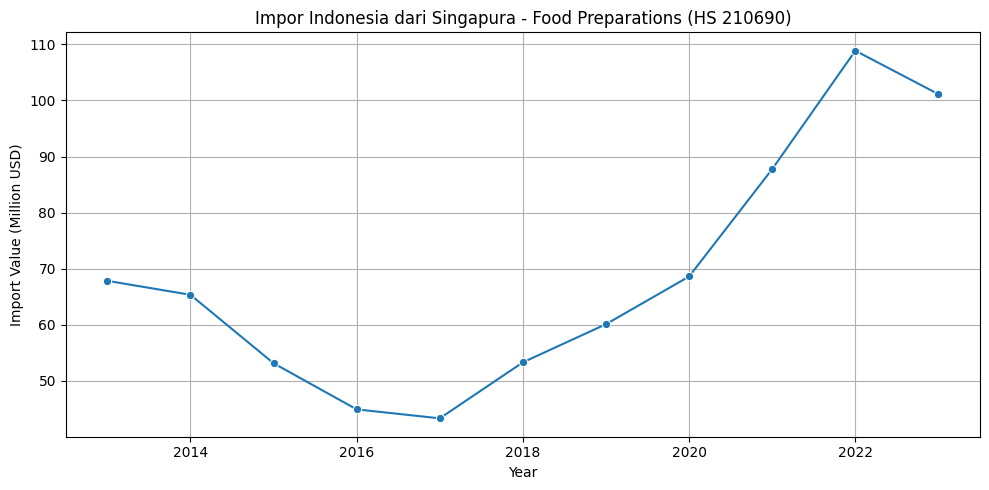

In [49]:
# Visualisasi historis
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_ts, x=df_ts.index, y='Value', marker='o')
plt.title("Impor Indonesia dari Singapura - Food Preparations (HS 210690)")
plt.ylabel("Import Value (Million USD)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Fit model ARIMA (lebih stabil: ARIMA(0,1,1))
model = ARIMA(df_ts, order=(0, 1, 1))
model_fit = model.fit()

In [51]:
# Ringkasan hasil model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   11
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -36.818
Date:                Mon, 21 Jul 2025   AIC                             77.637
Time:                        08:39:48   BIC                             78.242
Sample:                             0   HQIC                            76.973
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6427      0.368      1.749      0.080      -0.078       1.363
sigma2        87.5785     58.584      1.495      0.135     -27.243     202.400
Ljung-Box (L1) (Q):                   0.14   Jarque-

In [52]:
# Forecast tahun berikutnya
forecast = model_fit.forecast(steps=1)
forecast_year = df_ts.index.max() + 1
forecast_value = forecast.iloc[0]

In [53]:
print(f"Forecast untuk tahun {forecast_year}: {forecast_value:.2f} juta USD")

Forecast untuk tahun 2024: 91.08 juta USD


In [54]:
# Gabungkan data historis + forecast
df_forecast = df_ts.copy()
df_forecast.loc[forecast_year] = forecast_value

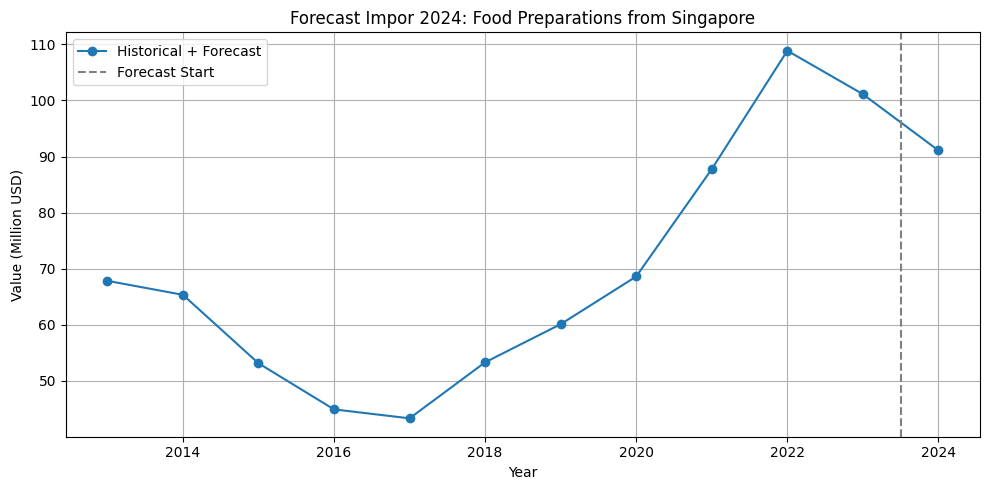

In [56]:
# Visualisasi hasil forecast
plt.figure(figsize=(10, 5))
plt.plot(df_forecast, marker='o', label='Historical + Forecast')
plt.axvline(x=forecast_year - 0.5, color='gray', linestyle='--', label='Forecast Start')
plt.title(f"Forecast Impor {forecast_year}: Food Preparations from Singapore")
plt.xlabel("Year")
plt.ylabel("Value (Million USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Key Insights - Indonesia Imports of Food Preparations from ASEAN (HS 210690)

###  1. Top Imported Product (2023)
- **"Food preparations, n.e.s." (HS 210690)** ranked as the top imported food product into Indonesia in 2023, with a total value of **248.36 million USD**, accounting for nearly **35%** of total imports across the analyzed food categories.
- Other high-value imported products:
  - Bakery & pastry items: **84.75 million USD**
  - Malt extract and flour-based preparations: **80.60 million USD**
  - Non-alcoholic beverages: **61.48 million USD**
  - Sauces & condiments: **53.07 million USD**

---

###  2. Top ASEAN Trade Partners (2023)
- **Singapore** is the leading exporter of HS 210690 to Indonesia with **101.12 million USD**.
- Followed by:
  - **Malaysia**: 90.69 million USD
  - **Thailand**: 42.47 million USD
  - **Philippines**: 9.59 million USD
  - **Vietnam**: 4.50 million USD

---

###  3. Heatmap - Product Distribution by Country
- Singapore dominates in HS 210690 but also exports other products:
  - Malt extract: 10.85 million USD
  - Sauces & condiments: 7.29 million USD
- Malaysia shows strong contributions in:
  - Bakery items: 56.82 million USD
  - Non-alcoholic beverages: 36.30 million USD
  - Sauces & condiments: 23.05 million USD

---

###  4. Yearly Import Trend from ASEAN (2013–2023)
- Imports remained relatively flat between 2013–2019.
- A strong upward surge started in 2020, peaking in 2022.
- The drop in 2023 may reflect post-COVID normalization or shifts in sourcing strategies.

---

###  5. Import Trend from Singapore - HS 210690 (2013–2023)
- Declined from 2013–2017, then rebounded starting in 2018.
- Reached a peak in 2022 (**108 million USD**), followed by a slight dip in 2023 (**101 million USD**).
- **2024 Forecast using ARIMA**: **91 million USD**
- **Actual Trade Value for 2024**: **88 million USD**
  -  The prediction accuracy was **very high**, with only a **3.3% margin of error**.

---

##  Strategic Business Implications
- HS 210690 is a **critical product category** for Indonesia's food supply chain.
- Dominant suppliers are **Singapore and Malaysia**, making them strategic trade partners.
- Post-pandemic surge in processed food imports highlights changing **consumer behavior**, increased urbanization, and preference for ready-to-eat or convenience food.
- This trend also reflects **opportunities for regional integration and supply chain optimization** in ASEAN.

---

## 📌 Recommendations

**For FMCG Companies (e.g., Unilever, Nestlé)**:
   - Prioritize partnerships with ASEAN hubs like Singapore and Malaysia.
   - Consider expanding local production or joint ventures to reduce reliance on imports.
